In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df_train1=df_train.drop(['User_ID','Product_ID'] ,axis=1)

In [5]:
df_train1.shape

(550068, 10)

In [6]:
df_train1.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [7]:
df_train1=df_train1.drop(['Product_Category_3'] ,axis=1)

In [8]:
cat2_mean=int(df_train1['Product_Category_2'].mean())

In [9]:
cat2_mean

9

In [10]:
df_train1['Product_Category_2']=df_train1['Product_Category_2'].fillna(cat2_mean)

In [11]:
df_train1.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
LB=LabelEncoder()

In [23]:
df_train1['Gender']= LB.fit_transform(df_train1['Gender'])
df_train1['City_Category']= LB.fit_transform(df_train1['City_Category'])
df_train1['Age']= LB.fit_transform(df_train1['Age'])
df_train1['Product_Category_2']= LB.fit_transform(df_train1['Product_Category_2'])

In [24]:
df_train1

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,0,0,10,0,2,0,3,7,8370
1,0,0,10,0,2,0,1,4,15200
2,0,0,10,0,2,0,12,7,1422
3,0,0,10,0,2,0,12,12,1057
4,1,6,16,2,4+,0,8,7,7969
...,...,...,...,...,...,...,...,...,...
550063,1,5,13,1,1,1,20,7,368
550064,0,2,1,2,3,0,20,7,371
550065,0,2,15,1,4+,1,20,7,137
550066,0,6,1,2,2,0,20,7,365


In [42]:
df_train1['Stay_In_Current_City_Years'].replace('4+','4',inplace=True)

In [33]:
df_train1.nunique()

Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Purchase                      18105
dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

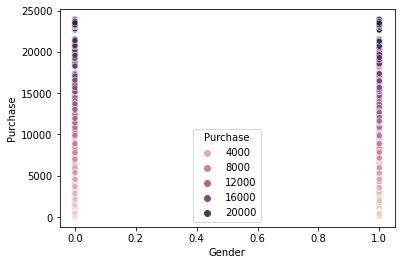

In [34]:
sns.scatterplot(x=df_train1['Gender'],y=df_train1['Purchase'],hue=df_train1['Purchase'])

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

c:\Users\manas\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


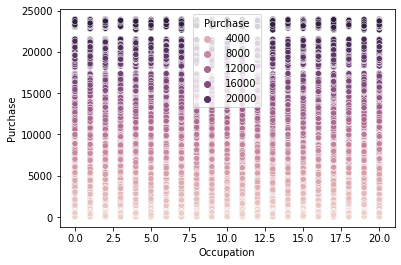

In [35]:
sns.scatterplot(x=df_train1['Occupation'],y=df_train1['Purchase'],hue=df_train1['Purchase'])

<AxesSubplot:xlabel='City_Category', ylabel='Purchase'>

c:\Users\manas\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


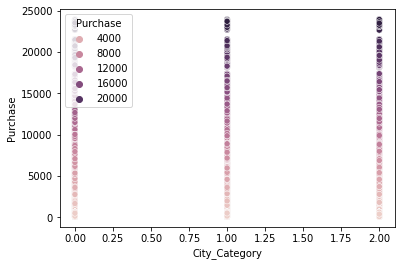

In [36]:
sns.scatterplot(x=df_train1['City_Category'],y=df_train1['Purchase'],hue=df_train1['Purchase'])

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [38]:
LR=LinearRegression()

In [43]:
x=df_train1.drop('Purchase',axis=1)
y=df_train1['Purchase']

In [44]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [45]:
LR.fit(xtrain,ytrain)

LinearRegression()

In [46]:
ypred=LR.predict(xtest)